
## Project: Unsupervised Learning for Marketing Campaigns
----------------------------------------


I will be using the Credit Card Customer Data for this project.

----------------------------
## Context: 
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


----------------------------
## Objective: 
-----------------------------

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Importing libraries and overview of the dataset

In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


#uncomment below to install the sklearn_extra library
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\19712\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

#### Loading data

In [2]:
data = pd.read_excel('Credit Card Customer Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Check the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let's now figure out the uniques in each column.** 

In [4]:
data.nunique() # returns the number of unique elements

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values. We should treat the same accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

#### **Identify and drop the rows with duplicated customer keys.**

In [5]:
# Identify the duplicated customer keys
duplicate_keys = data[data.duplicated(['Customer Key'])]

In [6]:
# Drop duplicated keys

data = data.drop_duplicates(subset='Customer Key', keep='first')


I have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [7]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

Now that I have dropped unnecessary column. I can again check for duplicates. Duplicates would mean customers with identical features.

In [8]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


I can drop these duplicated rows from the data

In [9]:
data=data[~data.duplicated()]

In [10]:
data.shape

(644, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

#### Summary Statistics

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**
- The averge credit limit seems to be right skewed with Q3 equal to 48000 and max being 200000.
- Q1,median and Q3 of total-visits-bank and total-visits-online are the same at 2. But  the maximum of total-visits-online is much higher at 15 comparing with the maximum number of total-visits-bank at 5.


#### Now let's go ahead with the exploring each variable at hand. I will check the distribution and outliers for each variable in the data.

Avg_Credit_Limit
Skew : 2.19


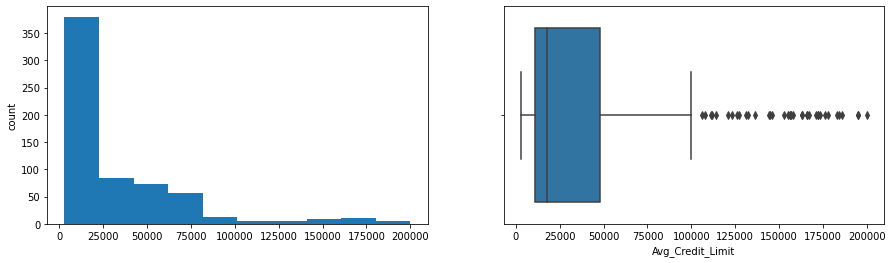

Total_Credit_Cards
Skew : 0.17


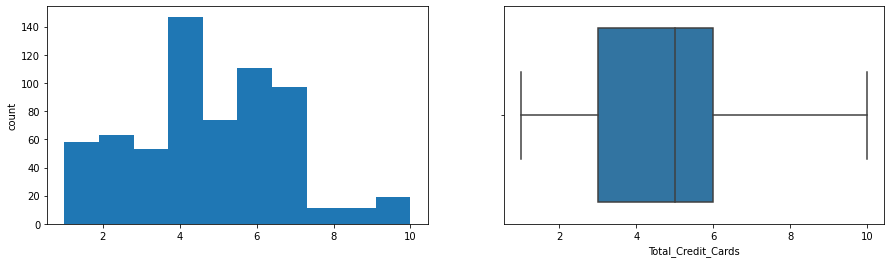

Total_visits_bank
Skew : 0.15


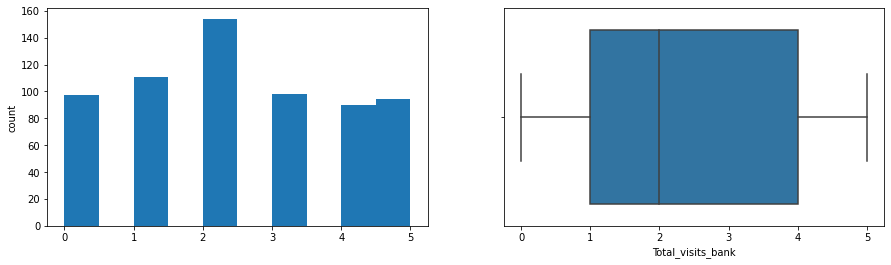

Total_visits_online
Skew : 2.21


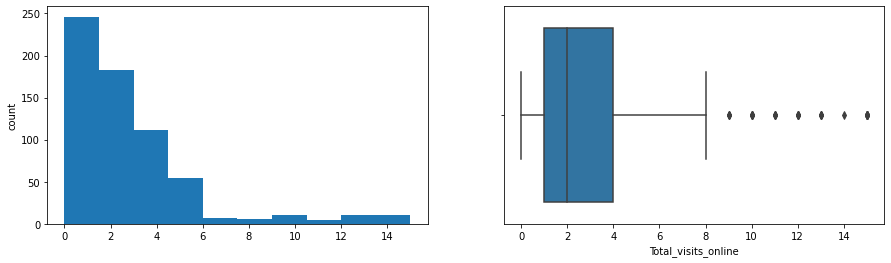

Total_calls_made
Skew : 0.65


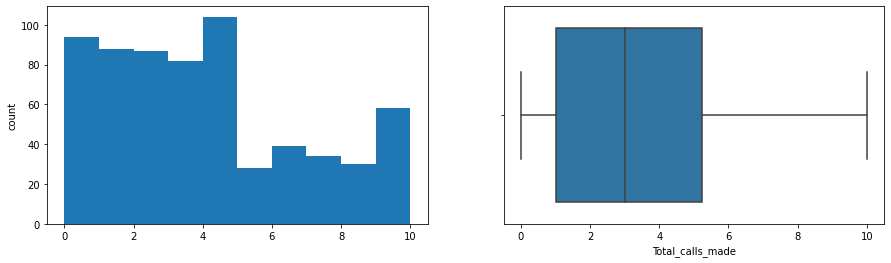

In [12]:


for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10,grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation:**
- Average_credit_limit and total_visits_online have the most skewness to the right.This pattern can also be seen from the boxplots with many outliers on the right.

- Total_credit_cards and total_visits_bank have the lowest skewness.

- Total_calls_made has a moderate skewness to the right.

**Now, let's check the correlation among different variables.**

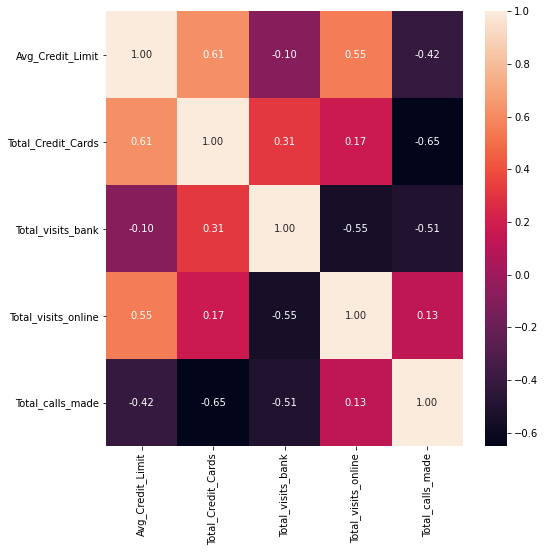

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can make sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scaling the data

In [14]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [15]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [16]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let's now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

I will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

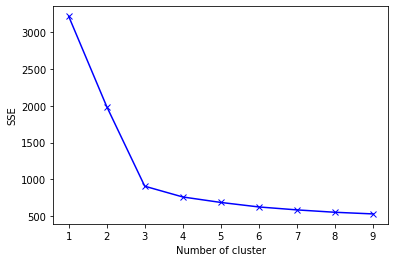

In [17]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

- The reason to select three is because that is where the graph changes its concavity. It is the cut off point at which the graph changes from decreasing very fast to decreasing slowly.

- **Fit the K-means algorithms on the scaled data with number of cluster equal to 3.**
- **Store the predictions as 'Labels' to the 'data_scaled_copy' and 'data' dataframes.**

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state= 1) #Apply the K-Means algorithm
kmeans.fit(data_scaled_copy)
data_scaled_copy['KmeansLabels'] = kmeans.predict(data_scaled_copy) #Fit the kmeans function on the scaled data

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['Labels'] =data_scaled_copy['KmeansLabels']  #Save the predictions on the scaled data from K-Means
data['Labels'] =data_scaled_copy['KmeansLabels'] #Save the predictions on the scaled data from K-Means


We have generated the labels with k-means. Let us look at the various features based on the labels.

#### ** Create cluster profiles using the below summary statistics and box plots for each label.**

In [19]:
#Number of observations in each cluster
data.Labels.value_counts()

1.0    362
0.0    218
2.0     48
Name: Labels, dtype: int64

In [20]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12293.577982,33187.845304,109270.833333,12000.0,30000.0,107000.0
Total_Credit_Cards,2.422018,5.461326,7.708333,2.0,6.0,8.0
Total_visits_bank,0.949541,3.469613,1.437500,1.0,3.0,1.0
Total_visits_online,3.568807,0.988950,7.854167,4.0,1.0,8.5
Total_calls_made,6.885321,2.069061,1.208333,7.0,2.0,1.0


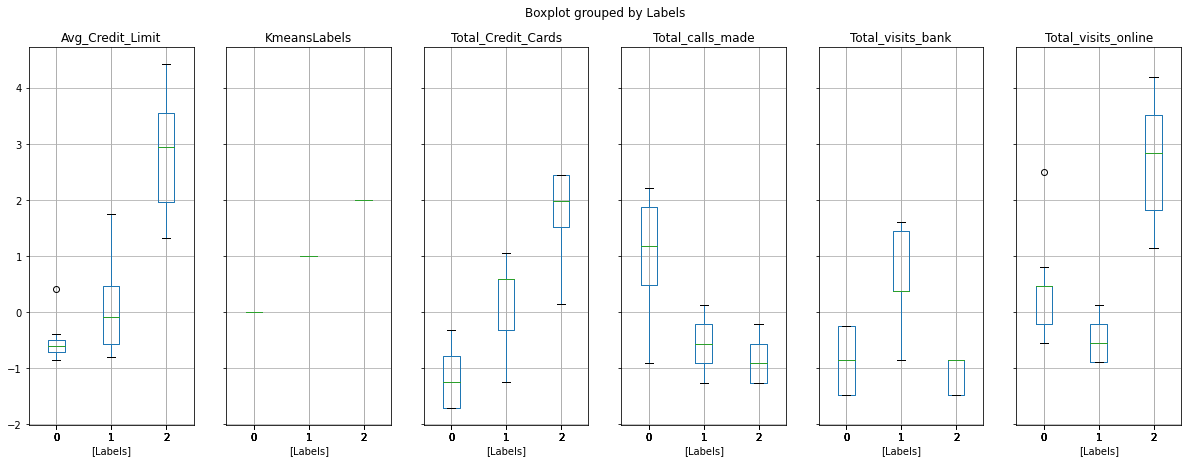

In [21]:
#Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,6),figsize=(20,7))
plt.show()

**Cluster Profiles:**
- Group_0, group_1, group_2
- group_2 has the highest mean and median of average credit limit with the most mean and meidan number of credit cards and total online visits.
- Very few people are clusterd in group_2 comparing with the number of people in group_0 and group_1.

## Gaussian Mixture

Let's create clusters using Gaussian Mixture Models

#### 

- **Apply the Gaussian Mixture algorithm on the scaled data with random_state=1.** 
- **Create cluster profiles using the below summary statistics and box plots for each label.**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture.**

In [25]:
from sklearn.mixture import GaussianMixture

gmm =GaussianMixture(n_components = 3, random_state=1)  #Apply the Gaussian Mixture algorithm
gmm.fit(data_scaled)  #Fit the gmm function on the scaled data

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [26]:
#Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [27]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


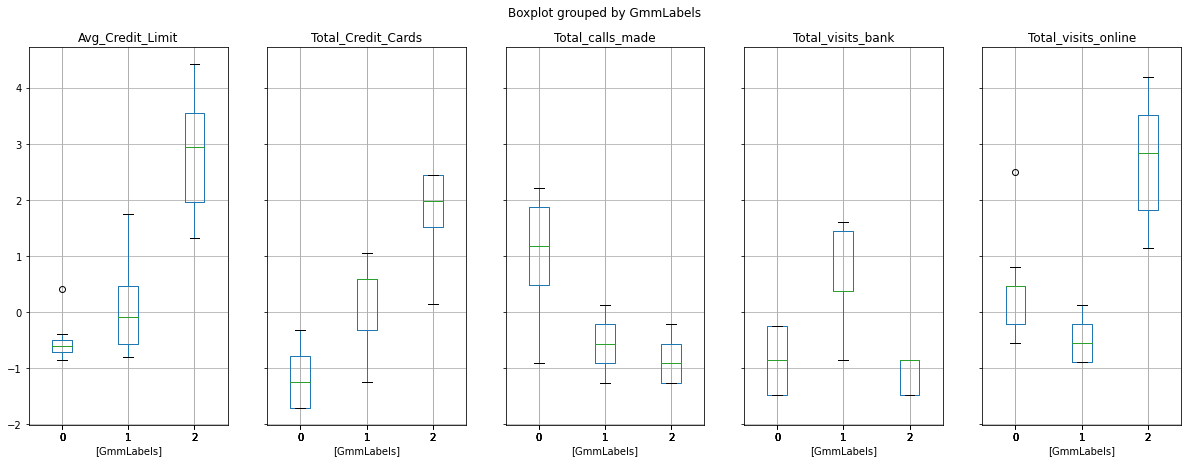

In [27]:

# plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:**
- group_0, group_1 and group_2

**Comparing Clusters:**
- The two types of cluster methods yield to similar clusters. Group_2 has the highest mean and median of average credit limit with the most mean and meidan number of credit cards and total online visits.
- Very few people are clusterd in group_2 comparing with the number of people in group_0 and group_1.
- group_0 has an outlier for average credit limit anad total number of visits online for both clustering methods.

## K-Medoids

#### 

- **Apply the K-Mediods on the scaled data with random_state=1.** 
- **Create cluster profiles using the below summary statistics and box plots for each label.**
- **Compare the clusters from both algorithms - K-Means and K-Medoids.**

In [28]:
#Install this package to use KMedoids
! pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids 

kmedo =KMedoids(n_clusters = 3, random_state=1)  #Apply the K-Medoids algorithm
kmedo.fit(data_scaled) #Fit the kmedo function on the scaled data

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [29]:
#Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [30]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


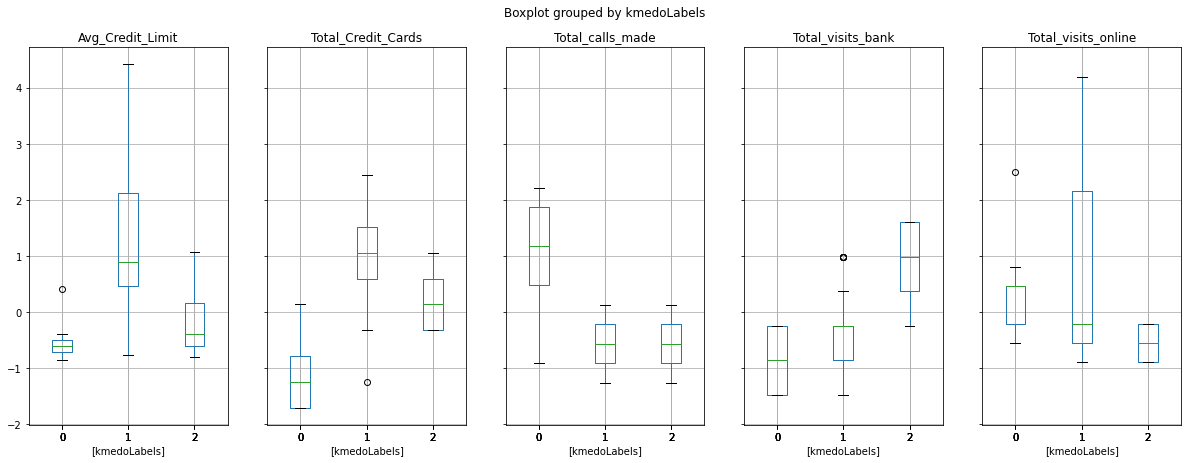

In [31]:
#plotting boxplots with the new DBScan based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Let's compare the clusters from K-Means and K-Medoids 

In [32]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12293.577982,2.423423,2.422018,0.950450,0.949541,3.554054,3.568807,6.878378,6.885321
group_1 Mean,85052.631579,33187.845304,7.030075,5.461326,1.691729,3.469613,4.639098,0.988950,1.969925,2.069061
group_2 Mean,28449.826990,109270.833333,5.363322,7.708333,3.830450,1.437500,0.982699,7.854167,1.851211,1.208333
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,30000.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,107000.000000,5.000000,8.000000,4.000000,1.000000,1.000000,8.500000,2.000000,1.000000


**Cluster Profiles:**
- Group_0, group_1 and group_2

**Comparing Clusters:**
- It looks like group_2 has the highest mean and median for average credit limit for both clustering methods. Group_2 has the higher average and medidan number of total online visits for kmean clustering. 
- Medoids put more people in group_2 whereas k-means clustered very few in group_2.